<div style="font-size:18pt; padding-top:20px; text-align:center; line-height: 1.5;">СЕМИНАР 5. <b>Оптимизация. Часть 2.</b> Стохастический градиентный спуск и библиотеки <span style="font-weight:bold; color:green">Python</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Градиентный спуска для функции с суммой квадратов</a>
            <ol style = "list-style-type:lower-alpha">
                <li><a href="#1a">Функция с суммой квадратов</a></li>
                <li><a href="#1b">Градиентный спуск</a></li>
                <li><a href="#1с">Стохастический градиентный спуск</a></li>
                <li><a href="#1d">Градиентный спуск в задаче линейной регрессии</a></li>
            </ol>
        </li>
        <li><a href="#2">Оптимизация и SciPy</a></li>
        <li><a href="#3">Источники</a></li>
    </ol>
</div>

In [1]:
import numpy as np
import pandas as pnd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Градиентный спуска для функции с суммой квадратов</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<a name = "1a"></a>
<div style = "display:table; width:100%">
    <div style = "display:table-row">
        <div style = "display:table-cell; width:80%; font-style:italic; font-weight:bold; font-size:12pt">
            a. Функция с суммой квадратов
        </div>
        <div style="display:table-cell; border:1px solid lightgrey; width:20%">
            <div style = "display:table-cell; width:10%; text-align:center; background-color:whitesmoke;">
                <a href="#1">Назад</a>
            </div>
            <div style = "display:table-cell; width:10%; text-align:center;">
                <a href="#1b">Далее</a>
            </div>
        </div>
    </div>
</div>

In [2]:
np.random.seed(100)
w1 = 0.5 * np.random.randn(1000) + 1
w2 = 0.5 * np.random.randn(1000) + 0.5
y = 0.5 * np.random.randn(1000)

In [5]:
# Количество элементов в выборке
n = len(y)

# Функция потерь (ошибки)  
f = lambda w1, w2, x1, x2: 1 / \
n * sum([(w1[i]*x1 + w2[i]*x2 - y[i]) ** 2 for i in range(n)])

In [6]:
coord_x1 = np.arange(-4, 5, 0.1) #Значения x c шагом 0.1
coord_x2 = np.arange(-4, 5, 0.1) #Значения x c шагом 0.1

x1, x2 = np.meshgrid(coord_x1, coord_x2)

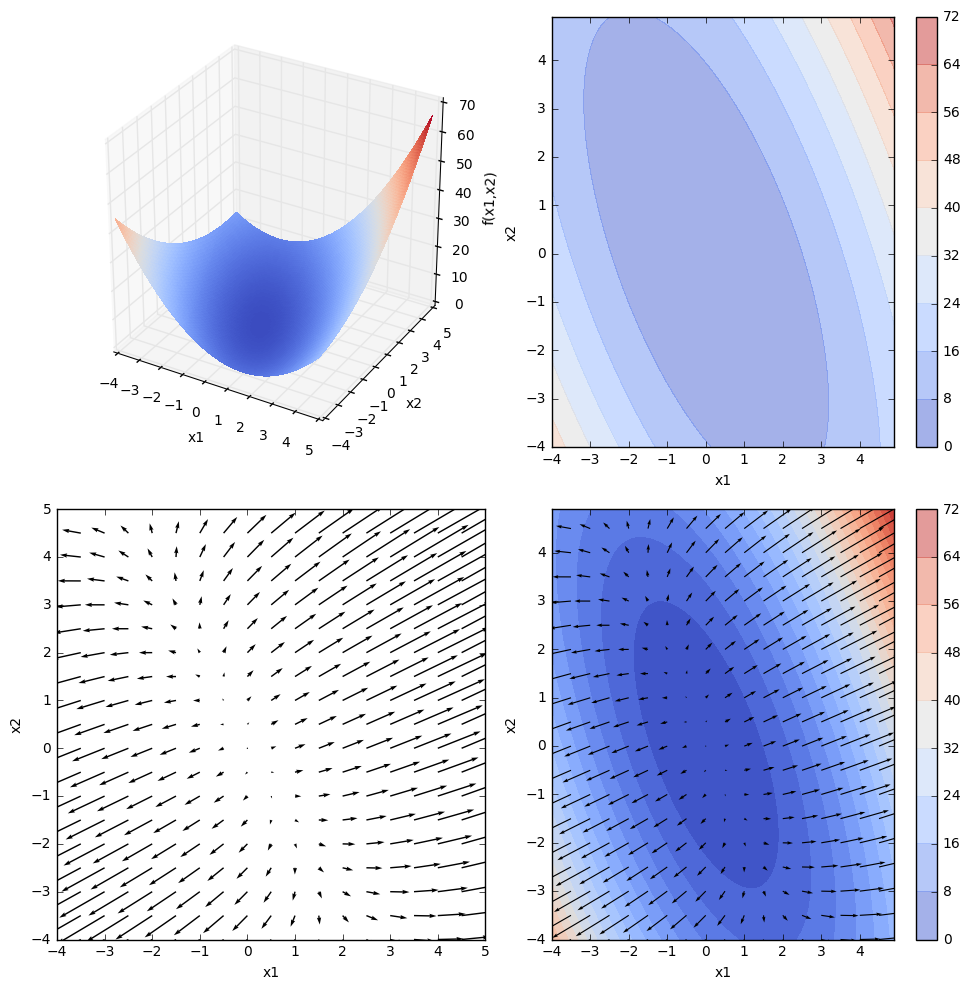

In [7]:
fig = plt.figure(1, figsize=(10, 10))

ax0 = fig.add_subplot(2, 2, 1, projection="3d")
ax0.plot_surface(x1, x2, f(w1, w2, x1, x2), rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax0.set_xlabel("x1")
ax0.set_ylabel("x2")
ax0.set_zlabel("f(x1,x2)")

ax1 = plt.subplot(2,2,2)
cf = ax1.contourf(x1, x2, f(w1, w2, x1, x2), 10, alpha=0.5, cmap=cm.coolwarm)
plt.colorbar(cf)
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")

ax2 = plt.subplot(2,2,3)
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")

X, Y = np.meshgrid(coord_x1[::5], coord_x2[::5])
Fxy = f(w1, w2, X, Y)
dX = coord_x1[5] - coord_x1[0]
dY = coord_x2[5] - coord_x2[0]
dFY,dFX = np.gradient(Fxy, dX, dY)

ax2.quiver(X, Y, dFX, dFY, scale=100)

ax3 = plt.subplot(2,2,4)
ax3.set_xlabel("x1")
ax3.set_ylabel("x2")
ax3.contourf(x1, x2, f(w1, w2, x1, x2), 25, cmap=cm.coolwarm)
ax3.quiver(X, Y, dFX, dFY, scale=100)
plt.colorbar(cf)

plt.tight_layout()

plt.show()

<a name = "1b"></a>
<div style = "display:table; width:100%">
    <div style = "display:table-row">
        <div style = "display:table-cell; width:80%; font-style:italic; font-weight:bold; font-size:12pt">
            b. Градиентный спуск
        </div>
        <div style="display:table-cell; border:1px solid lightgrey; width:20%">
            <div style = "display:table-cell; width:10%; text-align:center; background-color:whitesmoke;">
                <a href="#4a">Назад</a>
            </div>
            <div style = "display:table-cell; width:10%; text-align:center;">
                <a href="#4c">Далее</a>
            </div>
        </div>
    </div>
</div>

<p>Исследование влияния значения коэффициента альфа</p>

<p><b><i>Начальная точка 1</i></b></p>

<img src="img/gd-two-var-alpha-right-sum.png">

<p><b><i>Начальная точка 2</i></b></p>

<img src="img/gd-two-var-alpha-left-sum.png">

<a name = "1c"></a>
<div style = "display:table; width:100%">
    <div style = "display:table-row">
        <div style = "display:table-cell; width:80%; font-style:italic; font-weight:bold; font-size:12pt">
            c. Стохастический градиентный спуск
        </div>
        <div style="display:table-cell; border:1px solid lightgrey; width:20%">
            <div style = "display:table-cell; width:10%; text-align:center; background-color:whitesmoke;">
                <a href="#1b">Назад</a>
            </div>
            <div style = "display:table-cell; width:10%; text-align:center;">
                <a href="#1d">Далее</a>
            </div>
        </div>
    </div>
</div>

In [8]:
# Частные производные от функции потерь
df_x1_i = lambda w1, w2, x1, x2, i: 1/2.0 * w1[i] * (w1[i]*x1 + w2[i]*x2 - y[i])
df_x2_i = lambda w1, w2, x1, x2, i: 1/2.0 * w2[i] * (w1[i]*x1 + w2[i]*x2 - y[i])

In [275]:
def stochasticGradientDescent2D(w1, w2, alpha, f, dfx1i, dfx2i, err, startX1, startX2):
    
    n = len(y)
    
    x1_min = startX1
    x1_min_prev = startX1
    
    x2_min = startX2
    x2_min_prev = startX2
    
    j = 0
    
    for i in range(n):
        
        x1_min = x1_min_prev - alpha * dfx1i(w1, w2, x1_min_prev, x2_min_prev, i)
        x2_min = x2_min_prev - alpha * dfx2i(w1, w2, x1_min_prev, x2_min_prev, i)
        
        if abs(f(w1, w2, x1_min, x2_min) - f(w1, w2, x1_min_prev, x2_min_prev)) <= err:
            break
        
        x1_min_prev = x1_min
        x2_min_prev = x2_min

        j += 1
                     
    return (x1_min, x2_min, j)

In [276]:
alpha = 0.05
err = 0.0001
startX1 = 4
startX2 = -2

In [277]:
stochasticGradientDescent2D(w1, w2, alpha, f, df_x1_i, df_x2_i, err, startX1, startX2)

(1.7353519570127289, -2.3167146790733288, 45)

<p>Исследование влияния значения коэффициента альфа</p>

<p><b><i>Начальная точка 1</i></b></p>

<img src="img/sgd-two-var-alpha-right.png">

<p><b><i>Начальная точка 2</i></b></p>

<img src="img/sgd-two-var-alpha-left.png">

<a name = "4b"></a>
<div style = "display:table; width:100%">
    <div style = "display:table-row">
        <div style = "display:table-cell; width:80%; font-style:italic; font-weight:bold; font-size:12pt">
            b. Стохастический градиентный спуск в задаче линейной регрессии
        </div>
        <div style="display:table-cell; border:1px solid lightgrey; width:20%">
            <div style = "display:table-cell; width:10%; text-align:center; background-color:whitesmoke;">
                <a href="#4b">Назад</a>
            </div>
            <div style = "display:table-cell; width:10%; text-align:center;">
                <a href="#5">Далее</a>
            </div>
        </div>
    </div>
</div>

In [278]:
df1 = pnd.read_csv("data/SAT_GPA.csv", sep=" ")
df1.head(5)

,high_GPA,math_SAT,verb_SAT,comp_GPA,univ_GPA
0,3.45,643,589,3.76,3.52
1,2.78,558,512,2.87,2.91
2,2.52,583,503,2.54,2.40
3,3.67,685,602,3.83,3.47
4,3.24,592,538,3.29,3.47


In [6]:
sx = df1["high_GPA"]
sy = df1["univ_GPA"]
sx.head(5), sy.head(5)

(0    3.45
 1    2.78
 2    2.52
 3    3.67
 4    3.24
 Name: high_GPA, dtype: float64, 0    3.52
 1    2.91
 2    2.40
 3    3.47
 4    3.47
 Name: univ_GPA, dtype: float64)

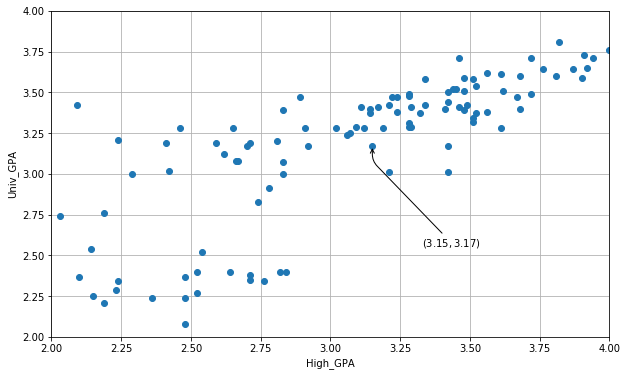

In [5]:
plt.figure("1", figsize=[10, 6])

ax = plt.subplot(1,1,1)

plt.scatter(sx, sy)
plt.xlabel("High_GPA")
plt.ylabel("Univ_GPA")
plt.axis([2, 4, 2, 4])
plt.grid(True)
ax.set_axisbelow(True)

xA = df1.loc[36, "high_GPA"]
yA = df1.loc[36, "univ_GPA"]
xyA = "$("+str(xA)+","+str(yA)+")$"
plt.annotate(xyA, xy=(xA, yA), xytext=(50, -100), xycoords='data', textcoords='offset points', 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc,angleA=0,armA=0,angleB=-90,armB=15,rad=7"),)
plt.show()

In [223]:
# Количество элементов в выборке
n = len(sx)

# Функция потерь (ошибки)  
err = lambda x, y, w0, w1: 1 / n * sum([(w1*x[i] + w0 - y[i]) ** 2 for i in range(n)])

# Частные производные от функции потерь
derr_w0_i = lambda x, y, w0, w1, i: 1 * (w0 + w1*x[i] - y[i])
derr_w1_i = lambda x, y, w0, w1, i: x[i] * (w0 + w1*x[i] - y[i])

In [236]:
# Критерии поиска
min_err = 0.0001

# Параметр альфа
alpha = 0.05

In [237]:
j = 0

w0_sgd = 0; w1_sgd = 0

w0_prev = 4; w1_prev = 4

for i in range(n):

    w0_sgd = w0_prev - alpha * derr_w0_i(sx, sy, w0_prev, w1_prev, i)
    w1_sgd = w1_prev - alpha * derr_w1_i(sx, sy, w0_prev, w1_prev, i)

    if abs(err(sx, sy, w0_sgd, w1_sgd) - err(sx, sy, w0_prev, w1_prev)) <= min_err:
        break

    w0_prev = w0_sgd
    w1_prev = w1_sgd

    j += 1

w0_sgd, w1_sgd, j

(2.6693008673449912, 0.18026440820054992, 95)

In [238]:
f_pred_sgd = lambda x: w1_sgd * x + w0_sgd

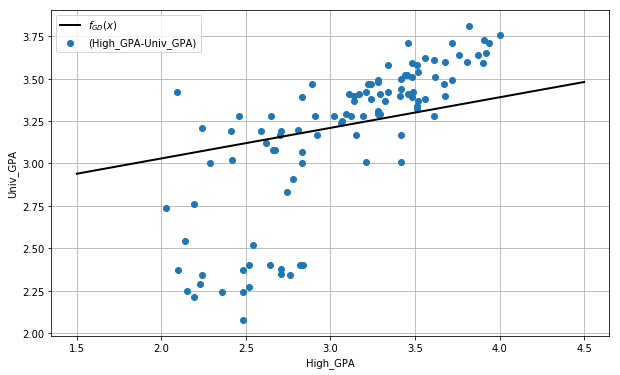

In [239]:
x_line = np.array([1.5, 4.5])

plt.figure("3", figsize=[10, 6])

ax = plt.subplot(1,1,1)

plt.scatter(sx, sy, label="(High_GPA-Univ_GPA)")
#plt.plot(x_line, f_pred_1(x_line), "-", label="$f_1(x)=0.9*x+0.3$")
#plt.plot(x_line, f_pred_2(x_line), "-", label="$f_2(x)=0.7*x+1.1$")
#plt.plot(x_line, f_pred_3(x_line), "-", label="$f_3(x)=0.4*x+2.0$")
#plt.plot(x_line, f_pred_ols(x_line), "-", linewidth=4, 
#         label="$f_{OLS}(x)$")
plt.plot(x_line, f_pred_sgd(x_line), "-", linewidth=2, color="black",
         label="$f_{SGD}(x)$")

plt.xlabel("High_GPA")
plt.ylabel("Univ_GPA")

#plt.axis([2, 4, 2, 4])

plt.grid(True)
ax.set_axisbelow(True) 

plt.legend()

plt.show()

In [240]:
# По x
sx_mean = sx.mean()
sx_std = sx.std()

sx_stand = sx.apply(lambda el: (el - sx_mean) / sx_std)

# По y
sy_mean = sy.mean()
sy_std = sy.std()

sy_stand = sy.apply(lambda el: (el - sy_mean) / sy_std)

In [241]:
# Критерии поиска
min_err_stand = 0.0001

# Параметр альфа
alpha_stand = 0.05

In [242]:
j = 0

w0_sgd_stand = 0; w1_sgd_stand = 0

w0_prev = 4; w1_prev = 4

for i in range(n):

    w0_sgd_stand = w0_prev - alpha_stand * derr_w0_i(sx_stand, sy_stand, w0_prev, w1_prev, i)
    w1_sgd_stand = w1_prev - alpha_stand * derr_w1_i(sx_stand, sy_stand, w0_prev, w1_prev, i)

    if abs(err(sx_stand, sy_stand, w0_sgd_stand, w1_sgd_stand) - err(sx_stand, sy_stand, w0_prev, w1_prev)) <= min_err_stand:
        break

    w0_prev = w0_sgd_stand
    w1_prev = w1_sgd_stand

    j += 1

w0_sgd_stand, w1_sgd_stand, j

(0.028032002608627558, 0.77667803360919041, 72)

In [243]:
f_pred_sgr_stand = lambda x: w1_sgd_stand * x + w0_sgd_stand

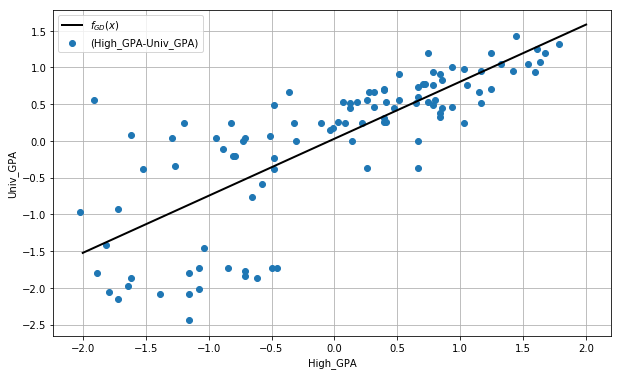

In [244]:
x_line = np.array([-2, 2])

plt.figure("3", figsize=[10, 6])

ax = plt.subplot(1,1,1)

plt.scatter(sx_stand, sy_stand, label="(High_GPA-Univ_GPA)")
#plt.plot(x_line, f_pred_1(x_line), "-", label="$f_1(x)=0.9*x+0.3$")
#plt.plot(x_line, f_pred_2(x_line), "-", label="$f_2(x)=0.7*x+1.1$")
#plt.plot(x_line, f_pred_3(x_line), "-", label="$f_3(x)=0.4*x+2.0$")
#plt.plot(x_line, f_pred_ols(x_line), "-", linewidth=4, 
#         label="$f_{OLS}(x)$")
plt.plot(x_line, f_pred_sgr_stand(x_line), "-", linewidth=2, color="black",
         label="$f_{SGD}(x)$")

plt.xlabel("High_GPA")
plt.ylabel("Univ_GPA")

#plt.axis([2, 4, 2, 4])

plt.grid(True)
ax.set_axisbelow(True) 

plt.legend()

plt.show()

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Оптимизация и SciPy</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

In [ ]:
from scipy.optimize import minimize, fmin_ncg, fmin, fmin_cg

<p>The downhill simplex algorithm. Nelder-Mead method </p>

In [ ]:
st_point = (4,-2)

res = fmin(f_2d, st_point, retall=True, disp=True)

<p>Nonlinear conjugate gradient algorithm</p>

In [ ]:
st_point = (4,-2)

res = fmin_cg(f_2d, st_point, retall=True, disp=True)

Nelder-Mead

In [ ]:
res = minimize(f_2d, np.array([2,3]), method="nelder-mead", options={"disp": True})
res

Powell

In [ ]:
res = minimize(f_1d, 8, method="powell", options={"xtol": 1e-8, "disp": True})
res

<p>Broyden-Fletcher-Goldfarb-Shanno algorithm</p>

In [ ]:
res = minimize(f, 8, method="BFGS", options={"disp": True})
res

Newton-CG

In [ ]:
res = minimize(f, 8, method="Newton-CG", options={"disp": True})
res

<a name="3"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">3. Источники</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>SciPy</p>
<a href = "http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.misc.derivative.html">scipy.misc.derivative</a><br>
<a href = "http://www.scipy-lectures.org/advanced/mathematical_optimization/">Mathematical optimization: finding minima of functions</a><br>

<a href = "https://books.google.ru/books?id=gl2kCAAAQBAJ&pg=PA84&lpg=PA84&dq=python+gradient+field&source=bl&ots=-3OAAkvVxC&sig=t_m9sqbKiV4I0iPXh_7GqTOtd2I&hl=ru&sa=X&ved=0ahUKEwjVmPmQ6dTKAhWEiSwKHY_fBEkQ6AEITjAG#v=onepage&q=python%20gradient%20field&f=false">A Student's Guide to Python for Physical Modeling</a><br>
<a href = "https://books.google.ru/books?id=K0B8BwAAQBAJ&pg=PA241&lpg=PA241&dq=python+gradient+field&source=bl&ots=Np0wRoLbEP&sig=TCjpF12bZwjZ6BeeAj6KmE1EHlQ&hl=ru&sa=X&ved=0ahUKEwjVmPmQ6dTKAhWEiSwKHY_fBEkQ6AEIVDAH#v=onepage&q=python%20gradient%20field&f=false">Mathematics and Python Programming</a><br>



<p>Дополнительно</p>
<a href = "http://mit.spbau.ru/files/scipy.pdf">Python. Библиотеки numpy, scipy, matplotlib, PIL</a><br>